In [1]:
import pandas as pd
import numpy as np
import math
import re
import matplotlib.pyplot as plt
import seaborn as sns

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Import movie metadata

In [2]:
tsv_file_path = 'data/movie.metadata.tsv'

# Define the column names based on the metadata structure.
column_names = [
    "Wikipedia movie ID",
    "Freebase movie ID",
    "Movie name",
    "Movie release date",
    "Movie box office revenue",
    "Movie runtime",
    "Movie languages",
    "Movie countries",
    "Movie genres",
]

# Read the TSV file into a pandas DataFrame and specify that it's tab-separated.
df = pd.read_csv(tsv_file_path, sep='\t', names=column_names, header=None)

# To display the DataFrame:
df


,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}"
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0..."
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}"
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ..."


## Extract languages, countries, genres, release year

In [3]:
# Function to extract the language names
def extract_language(language_data):
    language_names = []
    pattern = r'"([^"]+)"\s*:\s*"([^"]+)"'
    matches = re.findall(pattern, language_data)
    for match in matches:
        language_names.append(match[1].split(' ')[0])  # Extract the language name
    return ','.join(language_names)

# Apply the function to extract language names
df["Movie languages"] = df["Movie languages"].apply(extract_language)


In [4]:
# Function to extract the countries names
def extract_countries(country_data):
    country_names = []
    pattern = r'"([^"]+)"\s*:\s*"([^"]+)"'
    matches = re.findall(pattern, country_data)
    for match in matches:
        country_names.append(match[1])  # Extract the country name
    return ','.join(country_names)

# Apply the function to extract country names
df["Movie countries"] = df["Movie countries"].apply(extract_countries)


In [5]:
# Function to extract the genres
def extract_genres(genre_data):
    genre_names = []
    pattern = r'"([^"]+)"\s*:\s*"([^"]+)"'
    matches = re.findall(pattern, genre_data)
    for match in matches:
        genre_names.append(match[1])  # Extract the genre name
    return ','.join(genre_names)

# Apply the function to extract genre names
df["Movie genres"] = df["Movie genres"].apply(extract_genres)



In [6]:
# Function to extract the release year from the date
def extract_release_year(date_str):
    try:
        # Attempt to extract the year from the 'YYYY-MM-DD' format
        return pd.to_datetime(date_str).year
    except (ValueError, TypeError):
        try:
            # Attempt to extract the year from 'YYYY' format
            return int(date_str)
        except ValueError:
            return None  # Return None for invalid or missing dates

# Apply the function to the "Movie release date" column to create a new "Release Year" column
df['Movie release year'] = df['Movie release date'].apply(extract_release_year)
df = df.drop('Movie release date', axis=1)

In [7]:
# Convert 'genres', 'languages' and 'countries' columns from comma-separated strings to lists
df['Movie genres'] = df['Movie genres'].apply(lambda x: x.split(','))
df['Movie countries'] = df['Movie countries'].apply(lambda x: x.split(','))
df['Movie languages'] = df['Movie languages'].apply(lambda x: x.split(','))


In [8]:
df

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Movie release year
0,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,[English],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",2001.0
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,NaN,95.0,[English],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]",2000.0
2,28463795,/m/0crgdbh,Brun bitter,NaN,83.0,[Norwegian],[Norway],"[Crime Fiction, Drama]",1988.0
3,9363483,/m/0285_cd,White Of The Eye,NaN,110.0,[English],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri...",1987.0
4,261236,/m/01mrr1,A Woman in Flames,NaN,106.0,[German],[Germany],[Drama],1983.0
...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,NaN,120.0,[English],[United States of America],[Drama],2011.0
81737,34980460,/m/0g4pl34,Knuckle,NaN,96.0,[English],"[Ireland, United Kingdom]","[Biographical film, Drama, Documentary]",2011.0
81738,9971909,/m/02pygw1,Another Nice Mess,NaN,66.0,[English],[United States of America],"[Satire, Comedy]",1972.0
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,NaN,150.0,[Japanese],[Japan],"[Science Fiction, Japanese Movies, Adventure, ...",1992.0


## Import movie plot summaries

In [9]:
import nltk
import string
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jamallahjouji/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jamallahjouji/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jamallahjouji/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
def preprocess_summary(text):
    """
    Tokenize, lemmatize, remove stopwords and punctuations from an input text.
    
    Parameters
    ----------
    text: str, input text
    
    Returns
    -------
    str, preprocessed text
    """
    lemmatizer = WordNetLemmatizer()
    stop_words = stopwords.words('english')
    
    tokens = nltk.word_tokenize(text)
    text = [word for word in tokens if word not in string.punctuation]
    
    return " ".join([lemmatizer.lemmatize(word.lower()) for word in text if word.lower() not in stop_words])

In [11]:
"""
summaries: dictionary, with movie_id as keys and list of preprocessed words in the summary as values
"""
with open("./data/plot_summaries.txt", encoding='utf-8') as f:
    content = f.readlines()
original_summaries = [x.strip() for x in content] 
summaries = [preprocess_summary(d).split() for d in original_summaries]
summaries = {summary[0]: summary[1:] for summary in summaries}

In [12]:
# Convert keys of 'summaries' from strings to ints
summaries_int_keys = {int(k): v for k, v in summaries.items()}

# Filter the DataFrame to only include rows where 'Wikipedia movie ID' is a key in the updated 'summaries' dictionary
df = df[df['Wikipedia movie ID'].isin(summaries_int_keys.keys())]

# Add plot summary to DataFrame
df['Plot summary'] = df['Wikipedia movie ID'].map(summaries_int_keys)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Compute the sentiment score on the movie titles and movie plot summaries

In [13]:
from textblob import TextBlob

In [14]:
# Function to get compound sentiment score for title
def title_sentiment_score(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Function to compute sentiment score for plot
def plot_sentiment_score(text_list):
    text = " ".join(text_list)  # Convert list of words to a single string
    return TextBlob(text).sentiment.polarity


# Apply the functions to DataFrame
df['Sentiment score title'] = df['Movie name'].apply(title_sentiment_score)
df['Sentiment score plot'] = df['Plot summary'].apply(plot_sentiment_score)

# Display the DataFrame
df

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Wikipedia movie ID,Freebase movie ID,Movie name,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Movie release year,Plot summary,Sentiment score title,Sentiment score plot
0,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,[English],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",2001.0,"[set, second, half, 22nd, century, film, depic...",0.000000,-0.075099
3,9363483,/m/0285_cd,White Of The Eye,NaN,110.0,[English],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri...",1987.0,"[series, murder, rich, young, woman, throughou...",0.000000,0.039072
4,261236,/m/01mrr1,A Woman in Flames,NaN,106.0,[German],[Germany],[Drama],1983.0,"[eva, upper, class, housewife, becomes, frustr...",0.000000,0.152296
6,18998739,/m/04jcqvw,The Sorcerer's Apprentice,NaN,86.0,[English],[South Africa],"[Family Film, Fantasy, Adventure, World cinema]",2002.0,"[every, hundred, year, evil, morgana, return, ...",0.000000,-0.036790
12,6631279,/m/0gffwj,Little city,NaN,93.0,[English],[United States of America],"[Romantic comedy, Ensemble Film, Comedy-drama,...",1997.0,"[adam, san, francisco-based, artist, work, cab...",-0.187500,0.162716
...,...,...,...,...,...,...,...,...,...,...,...,...
81733,23851782,/m/06_vb43,The Ghost Train,NaN,82.0,[English],[United Kingdom],"[Crime Fiction, Thriller, Comedy, Supernatural]",1941.0,"[plot, film, open, great, western, express, sp...",0.000000,-0.052381
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,NaN,120.0,[English],[United States of America],[Drama],2011.0,"[two, former, national, oceanic, atmospheric, ...",0.000000,0.095833
81737,34980460,/m/0g4pl34,Knuckle,NaN,96.0,[English],"[Ireland, United Kingdom]","[Biographical film, Drama, Documentary]",2011.0,"[plot, film, follows, 12, year, life, 3, irish...",0.000000,0.010000
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,NaN,150.0,[Japanese],[Japan],"[Science Fiction, Japanese Movies, Adventure, ...",1992.0,"[story, take, place, year, 2092, super, dimens...",0.333333,0.185669


## Plots of different variable distributions

In [15]:
def var_distrib_plots(dataframe):
    # Plotting histogram
    plt.figure(figsize=(10, 6))
    plt.hist(dataframe['Sentiment score title'], bins=[i/10.0 for i in range(-10, 11)], edgecolor='black')
    plt.title('Histogram of Sentiment Scores on titles')
    plt.xlabel('Sentiment Score on title')
    plt.ylabel('Number of Movies')
    plt.grid(True)
    plt.show()
    
    # Drop rows where box office revenue is NaN
    df_filtered_box = dataframe.dropna(subset=['Movie box office revenue'])

    # Plotting histogram for box office revenues
    bin_width = 10000000  # Bin width set to 100 million
    bins_range = range(0, int(df_filtered_box['Movie box office revenue'].max()) + bin_width, bin_width)

    plt.figure(figsize=(10, 6))
    plt.hist(df_filtered_box['Movie box office revenue'], bins=bins_range, edgecolor='black')
    plt.title('Histogram of Box Office Revenues (in millions)')
    plt.xlabel('Box Office Revenue (in millions)')
    plt.ylabel('Number of Movies')
    plt.xlim(0,800000000)
    plt.grid(True)
    plt.show()
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(df_filtered_box['Sentiment score title'],df_filtered_box['Movie box office revenue'])
    plt.title('Box Office Revenue vs Sentiment Score on title')
    plt.xlabel('Sentiment Score on titles')
    plt.ylabel('Box Office Revenue (in millions)')
    plt.grid(True)
    plt.show()

  

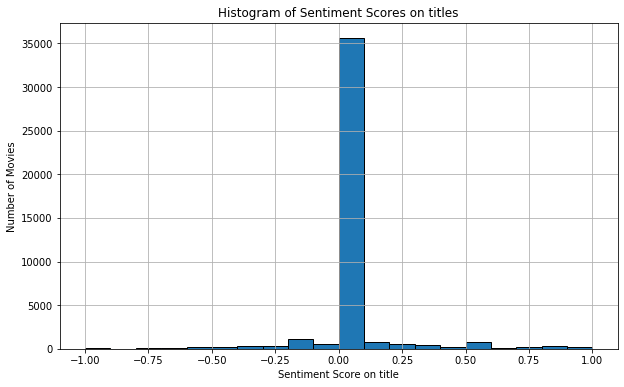

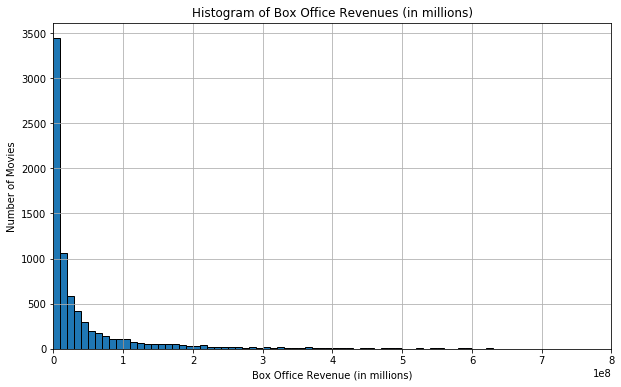

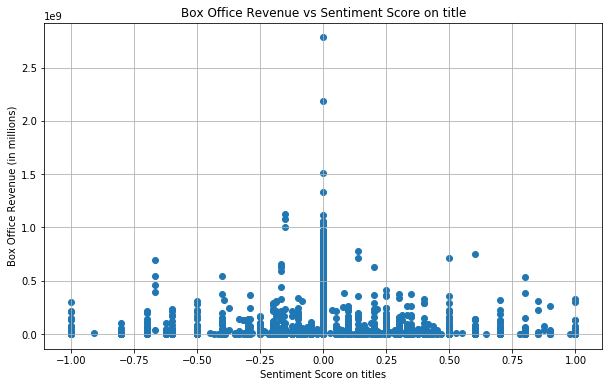

In [16]:
var_distrib_plots(df)

## Compute the percentage of zero sentiment score on movie title and plot

In [18]:
number_of_zeros_title = (df['Sentiment score title'] == 0).sum()
number_of_zeros_plot = (df['Sentiment score plot'] == 0).sum()

print("Percentage of zero sentiment score on movie title:", round(100*number_of_zeros_title/len(df),2), "%")
print("Percentage of zero sentiment score on movie plot:", round(100*number_of_zeros_plot/len(df),2), "%")


Percentage of zero sentiment score on movie title: 84.01 %
Percentage of zero sentiment score on movie plot: 3.39 %


## Compute the percentage of movies with missing box office revenue

In [19]:
# Count the number of NaN values in the 'revenues' column
nan_count = df['Movie box office revenue'].isna().sum()

# Print the count of NaN values
print(f"Proportion of movies with missing box office revenue on the original dataset: {round(100*nan_count/len(df),2)} %")

Proportion of movies with missing box office revenue on the original dataset: 82.02 %


## Compute the percentage of movies showing a single genre

In [22]:
proportion_single_element = df['Movie genres'].apply(len).eq(1).mean()

# Print the count of single genre movies
print(f"Proportion of movies with missing box office revenue on the original dataset: {round(proportion_single_element*100,2)} %")

Proportion of movies with missing box office revenue on the original dataset: 20.93 %


# Analysis

In [23]:
def sentiment_analysis(dataframe):
    # Plotting histogram
    plt.figure(figsize=(10, 6))
    plt.hist(dataframe["Sentiment score plot"], bins=[i/10.0 for i in range(-10, 11)], edgecolor='black')
    plt.title("Sentiment Score on plots Distribution")
    plt.xlabel("Sentiment Score on plot")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()
    
    # Calculate the average sentiment score by year
    average_sentiment_by_year = dataframe.groupby('Movie release year')['Sentiment score plot'].mean().reset_index()

    # Bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(average_sentiment_by_year['Movie release year'], average_sentiment_by_year['Sentiment score plot'],  color='blue')
    plt.title('Average Movie Sentiment Score on plot vs Movie Release Year')
    plt.xlabel('Release Year')
    plt.ylabel('Average Sentiment Score')
    plt.grid(True)
    plt.show()

    # Classic plot
    plt.figure(figsize=(10, 6))
    plt.plot(average_sentiment_by_year['Movie release year'], average_sentiment_by_year['Sentiment score plot'], marker = 'o', color='blue')
    plt.title('Average Movie Sentiment Score on plot vs Movie Release Year')
    plt.xlabel('Release Year')
    plt.ylabel('Average Sentiment Score')
    plt.grid(True)
    plt.show()
    
    # Explode the DataFrame so each genre has its own row along with the sentiment score.
    df_exploded = dataframe.explode('Movie genres')
    
    # Find the top 10 most prevalent genres
    top_genres = df_exploded['Movie genres'].value_counts().head(10).index

    # Filter the exploded DataFrame to only include relevant genres
    df_top_genres = df_exploded[df_exploded['Movie genres'].isin(top_genres)]

    # Group by 'genres' again and compute the average sentiment score for the relevant genres
    top_genres_sentiment = df_top_genres.groupby('Movie genres')['Sentiment score plot'].mean().reset_index()

    top_genres_data = pd.DataFrame({
        'Movie genres': top_genres_sentiment['Movie genres'],
        'Average Sentiment Score on plot': top_genres_sentiment['Sentiment score plot']
    })
    
    # Plot the distribution for relevant genres
    plt.figure(figsize=(10, 6))
    plt.bar(top_genres_data['Movie genres'], top_genres_data['Average Sentiment Score on plot'], color='blue')
    plt.xlabel('Genres')
    plt.ylabel('Average Sentiment Score on plot')
    plt.title('Distribution of Sentiment Score on plot for 10 Prevalent Genres')
    plt.xticks(rotation=45)
    plt.grid()
    plt.tight_layout()  # Adjust layout to accommodate the genre labels
    plt.show()

    # Create a violin plot for the distribution of sentiment scores for the top 10 genres
    plt.figure(figsize=(12, 8))
    sns.violinplot(x='Movie genres', y='Sentiment score plot', data=df_top_genres, palette='muted')
    plt.xlabel('Genres')
    plt.ylabel('Sentiment Score on plot')
    plt.title('Distribution of Sentiment Score for Top 10 Genres')
    plt.grid()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Display the DataFrame containing the relevant genres and their average sentiment scores
    print(df_top_genres['Movie genres'].value_counts())





### Analysis on all movies with plot summaries

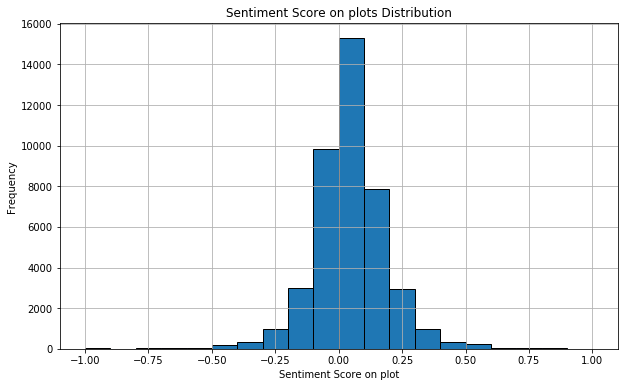

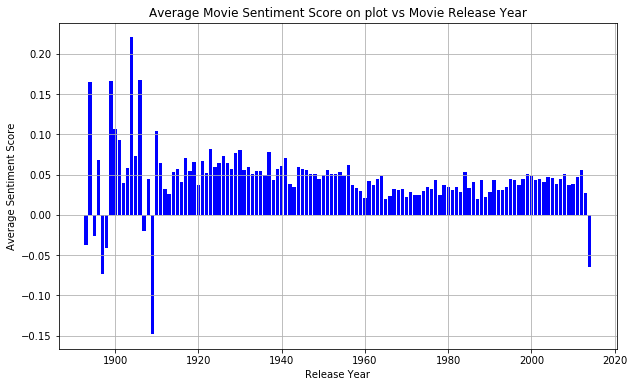

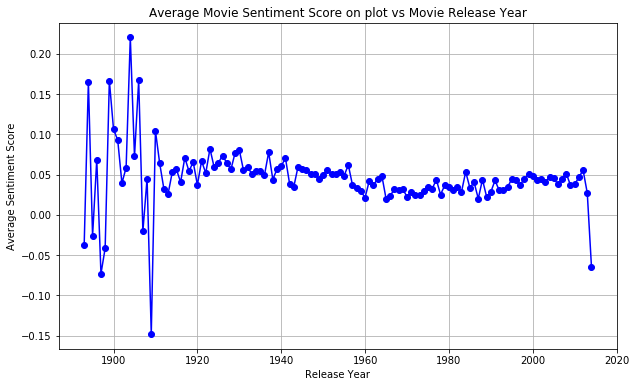

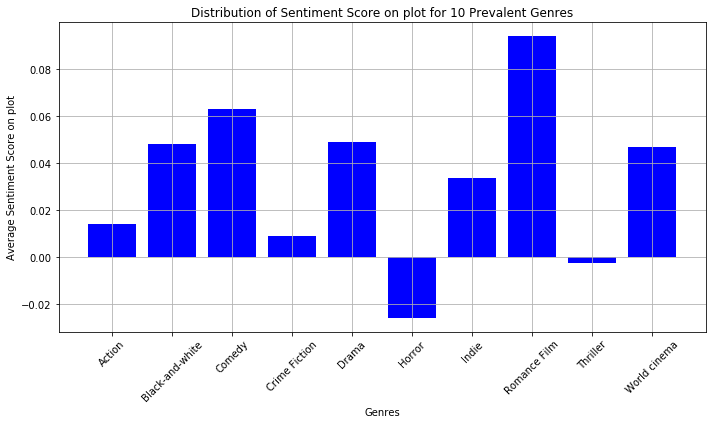

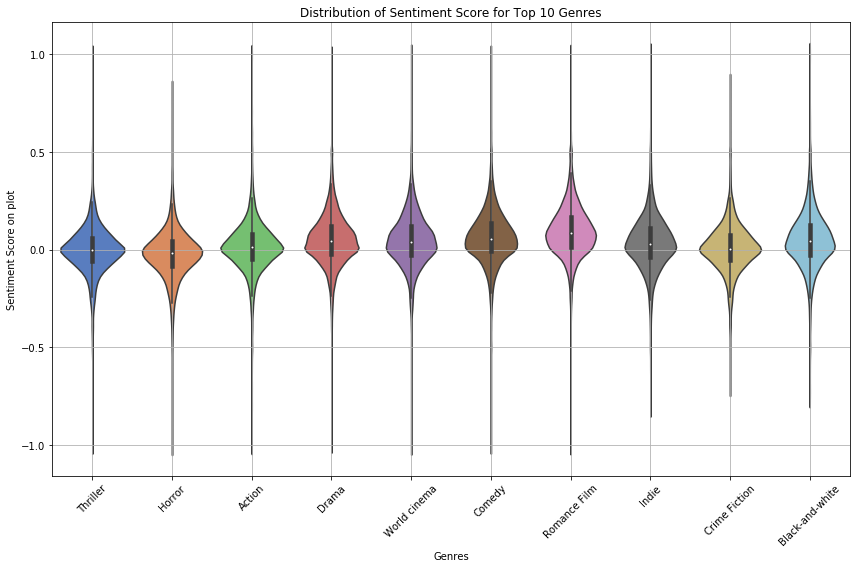

Drama              19135
Comedy             10468
Romance Film        6666
Thriller            6530
Action              5869
World cinema        5153
Crime Fiction       4277
Horror              4083
Black-and-white     3731
Indie               3668
Name: Movie genres, dtype: int64


In [25]:
sentiment_analysis(df)

## Analysis on all movies with plot summaries and a single genre

In [26]:
df_single_genre = df[df['Movie genres'].apply(len).eq(1)].copy()

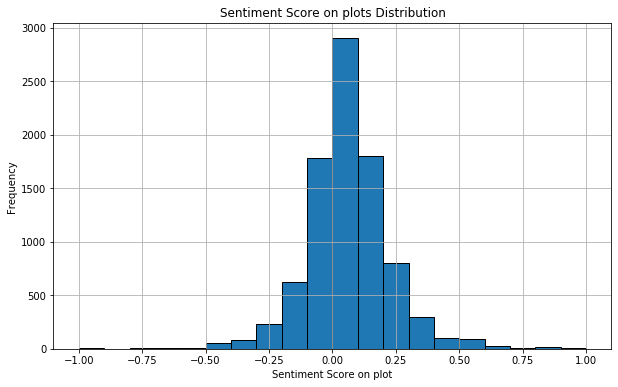

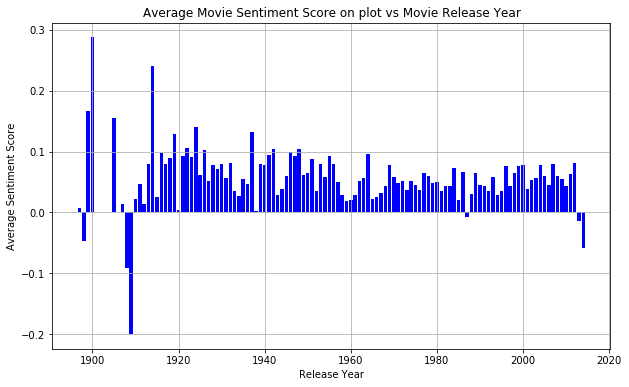

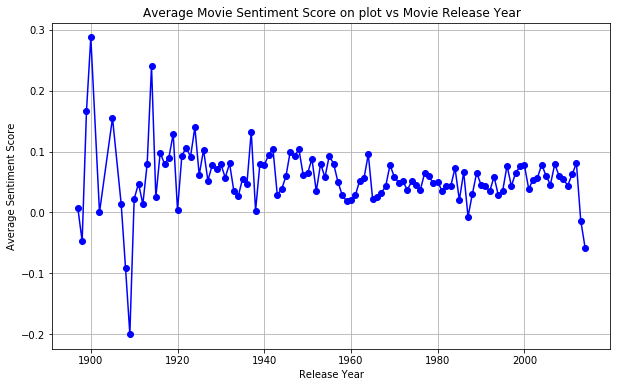

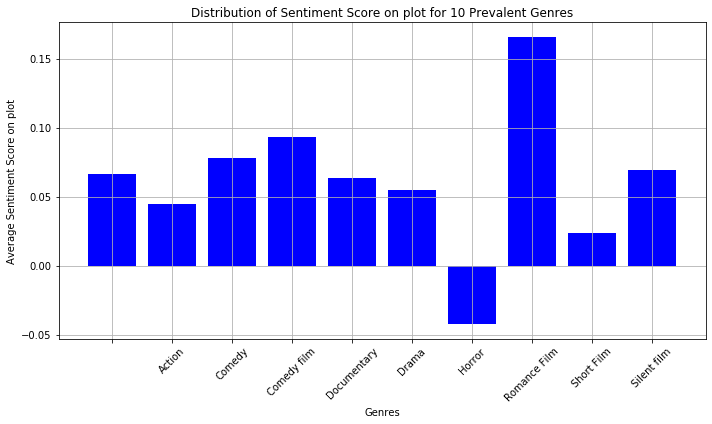

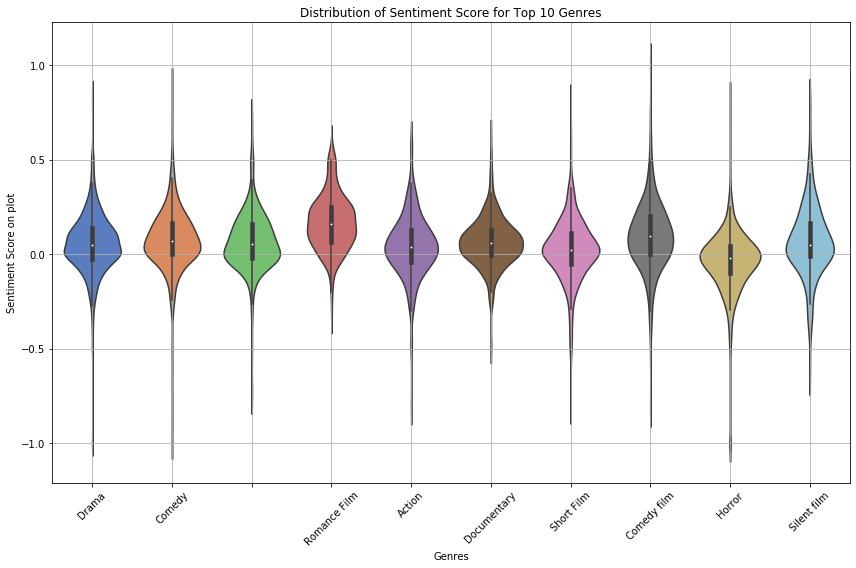

Drama           2641
Comedy           830
Short Film       507
Horror           474
Documentary      460
                 411
Comedy film      383
Action           360
Romance Film     295
Silent film      274
Name: Movie genres, dtype: int64


In [27]:
sentiment_analysis(df_single_genre)

#### Sanity check

In [29]:
proportion_single_element == len(df_single_genre)/len(df)

True